# Hotel Reservation

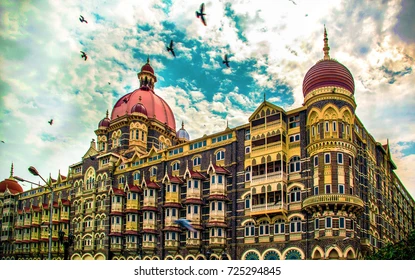

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

### Loading the dataset

In [2]:
data=pd.read_csv('./Hotel Reservations.csv')
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Dropping unwanted columns

In [4]:
data.drop(columns=['Booking_ID','no_of_special_requests'],inplace=True)

#### Checking for nulls

In [5]:
data.isnull().mean()*100

no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
booking_status                          0.0
dtype: float64

#### Checking for duplicates

In [6]:
data.duplicated().sum()

10660

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,25615.0,1.890299,0.529734,0.0,2.00,2.0,2.0,4.0
no_of_children,25615.0,0.142260,0.464127,0.0,0.00,0.0,0.0,10.0
no_of_weekend_nights,25615.0,0.884404,0.888153,0.0,0.00,1.0,2.0,7.0
no_of_week_nights,25615.0,2.262307,1.515575,0.0,1.00,2.0,3.0,17.0
required_car_parking_space,25615.0,0.042709,0.202205,0.0,0.00,0.0,0.0,1.0
lead_time,25615.0,66.114113,68.253014,0.0,12.00,44.0,99.0,443.0
arrival_year,25615.0,2017.851298,0.355801,2017.0,2018.00,2018.0,2018.0,2018.0
arrival_month,25615.0,7.329377,3.141419,1.0,5.00,8.0,10.0,12.0
arrival_date,25615.0,15.752176,8.850296,1.0,8.00,16.0,23.0,31.0
repeated_guest,25615.0,0.033223,0.179221,0.0,0.00,0.0,0.0,1.0


## Univeriate Analysis

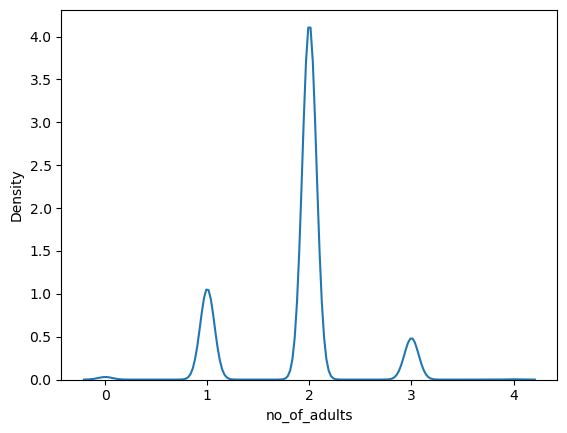

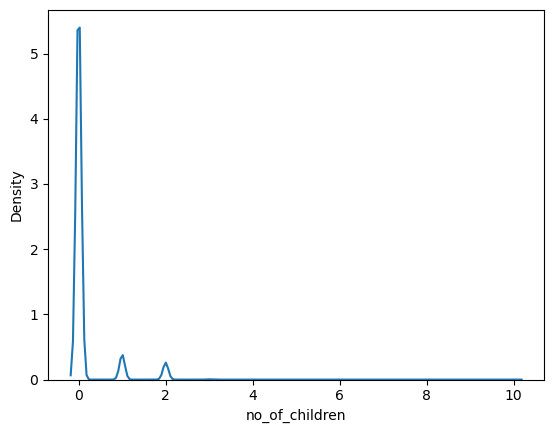

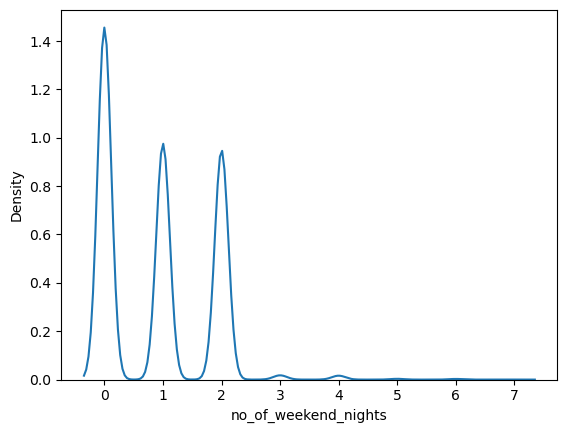

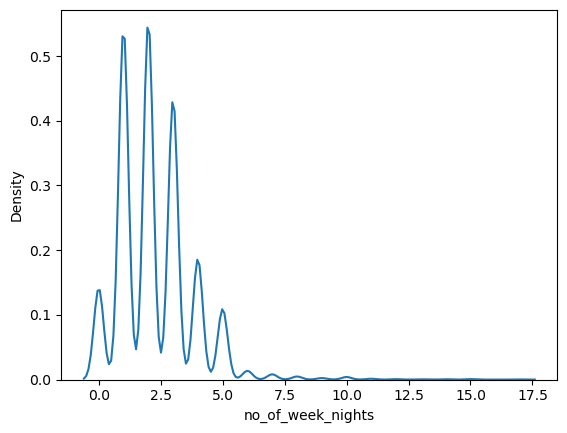

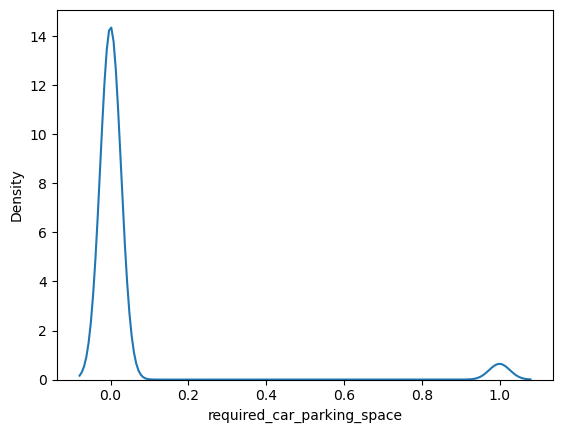

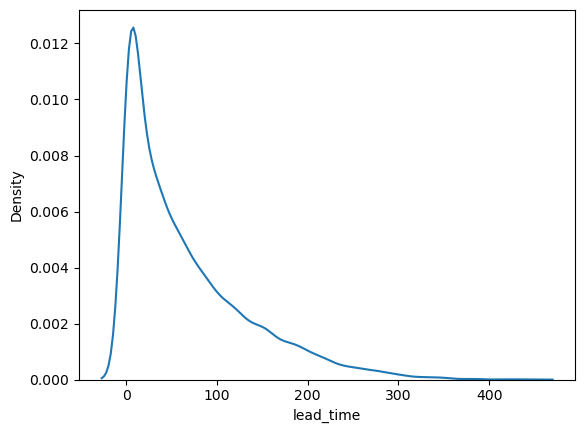

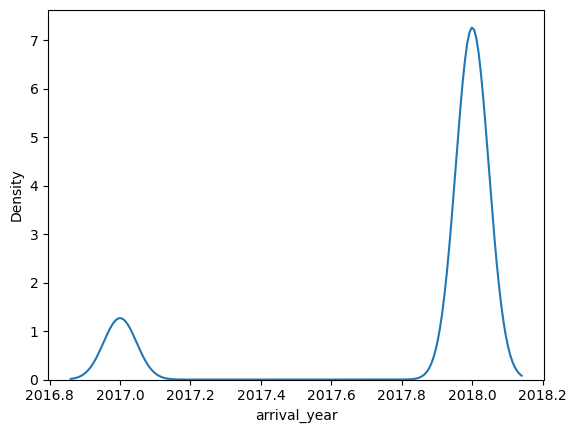

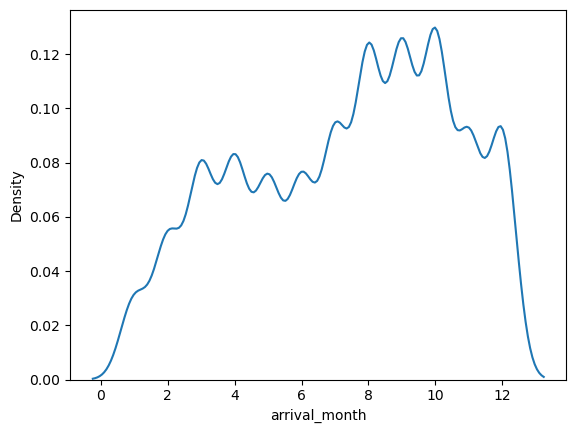

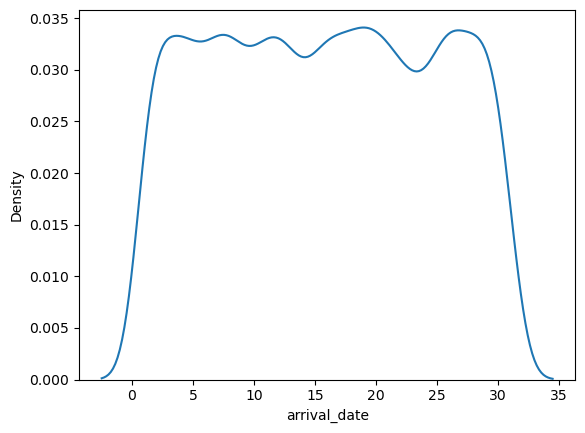

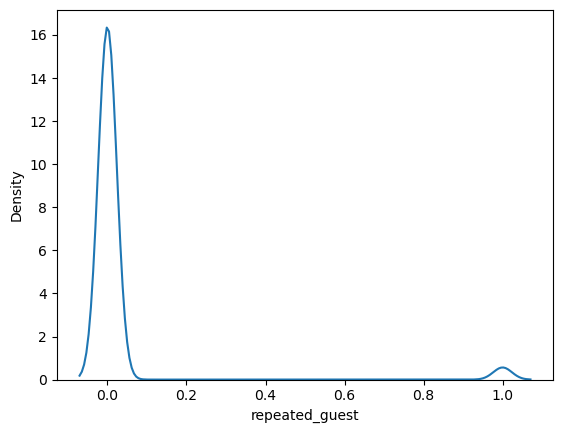

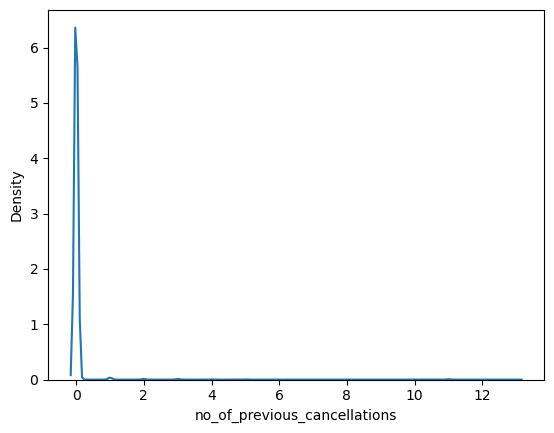

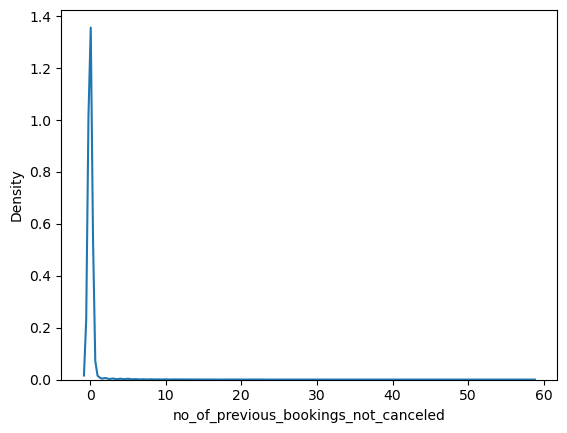

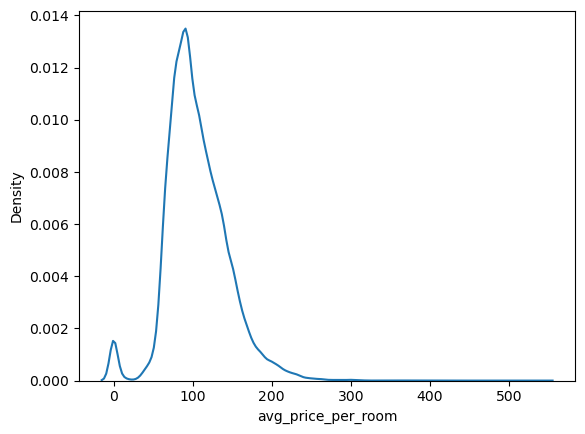

In [9]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i])
        plt.show()

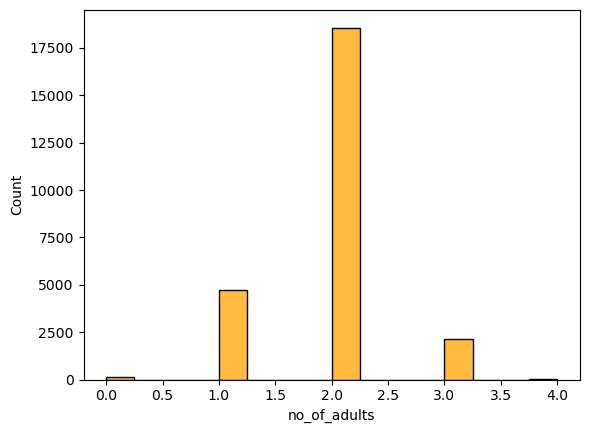

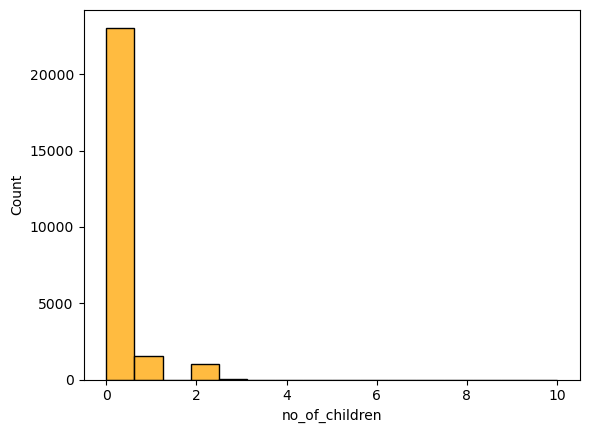

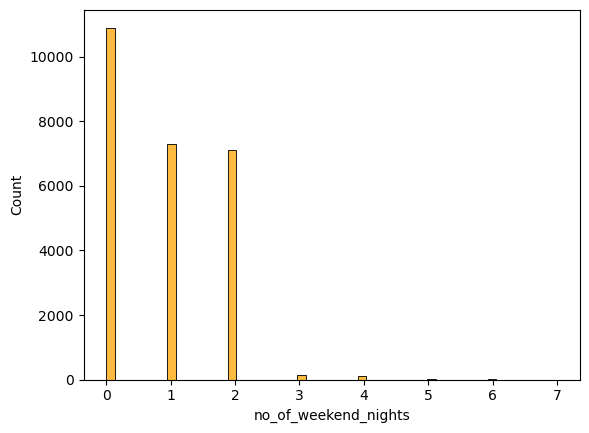

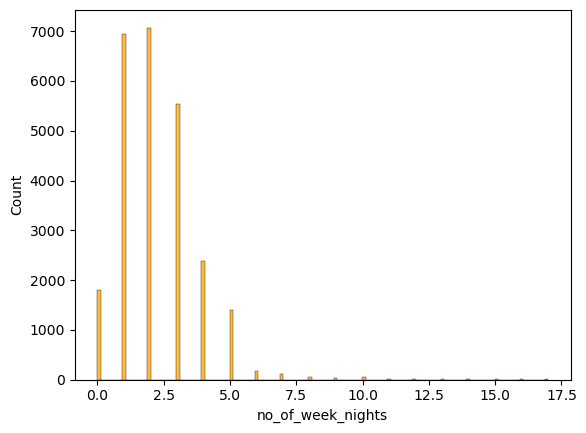

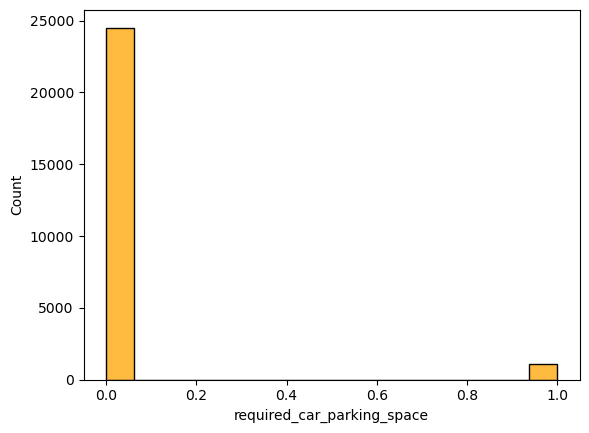

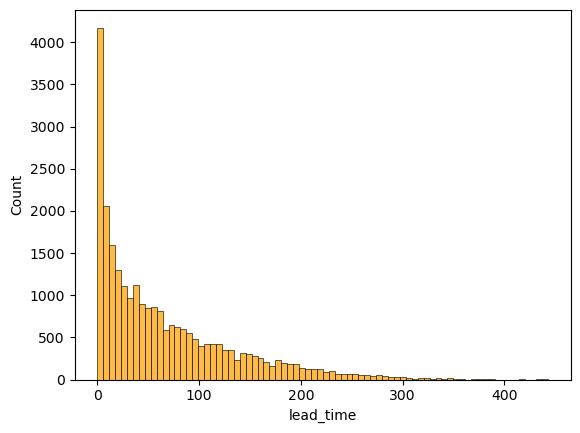

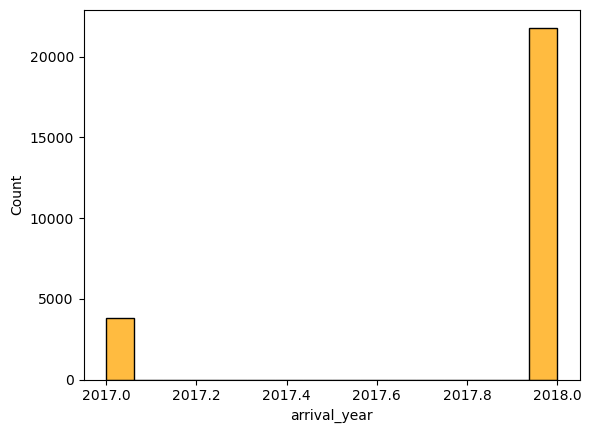

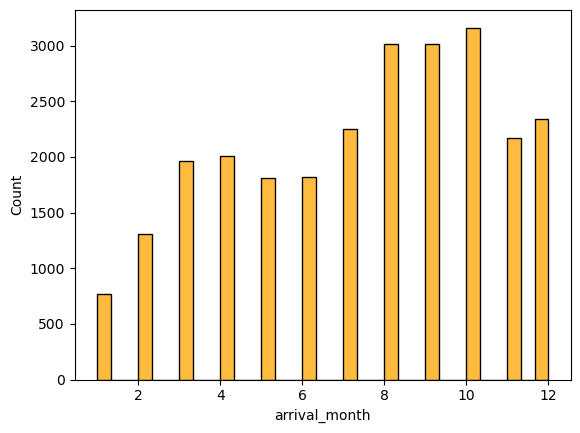

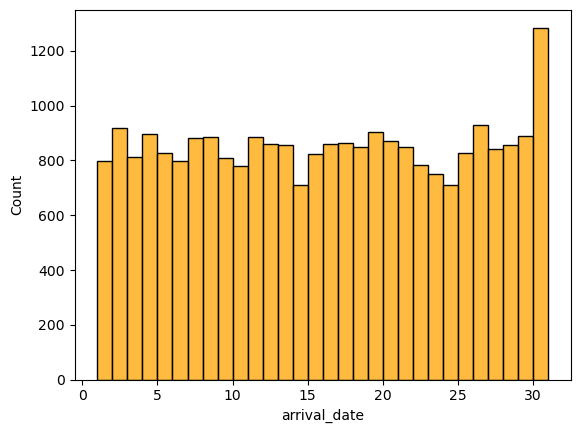

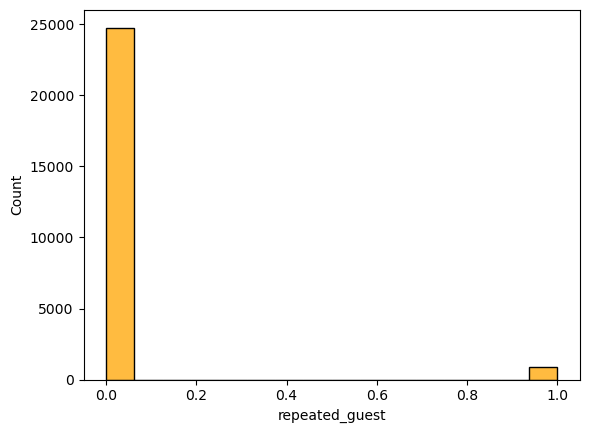

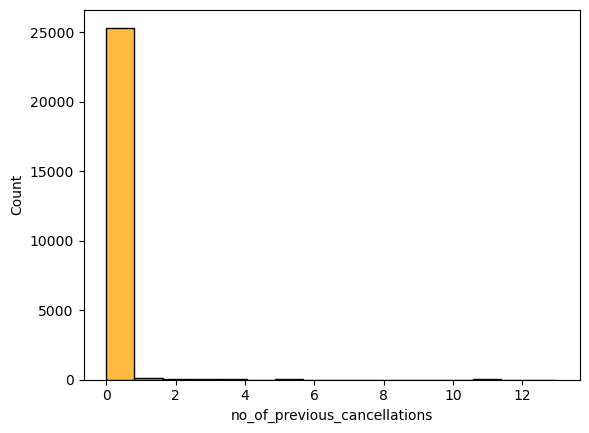

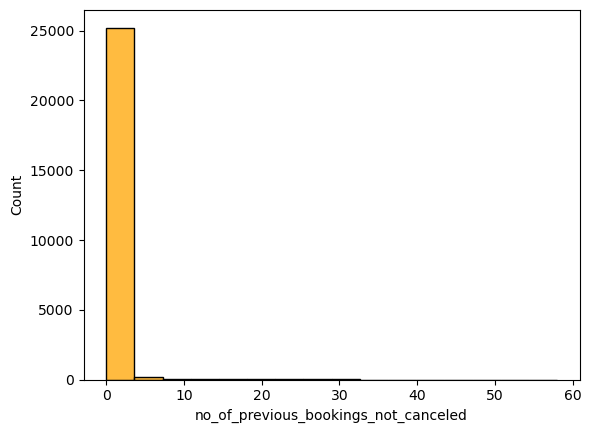

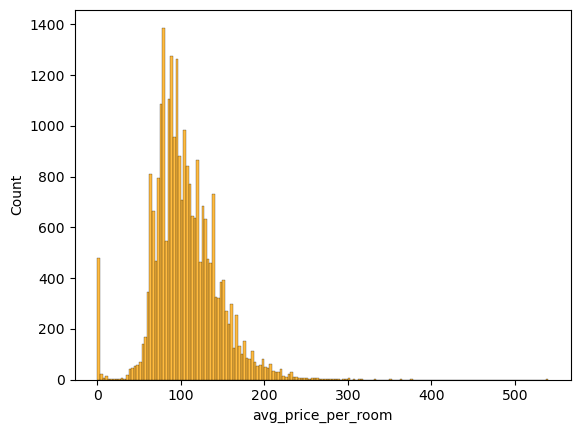

In [10]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.histplot(data, x=data[column], color="orange")
        plt.show()

## Multivariate Analysis

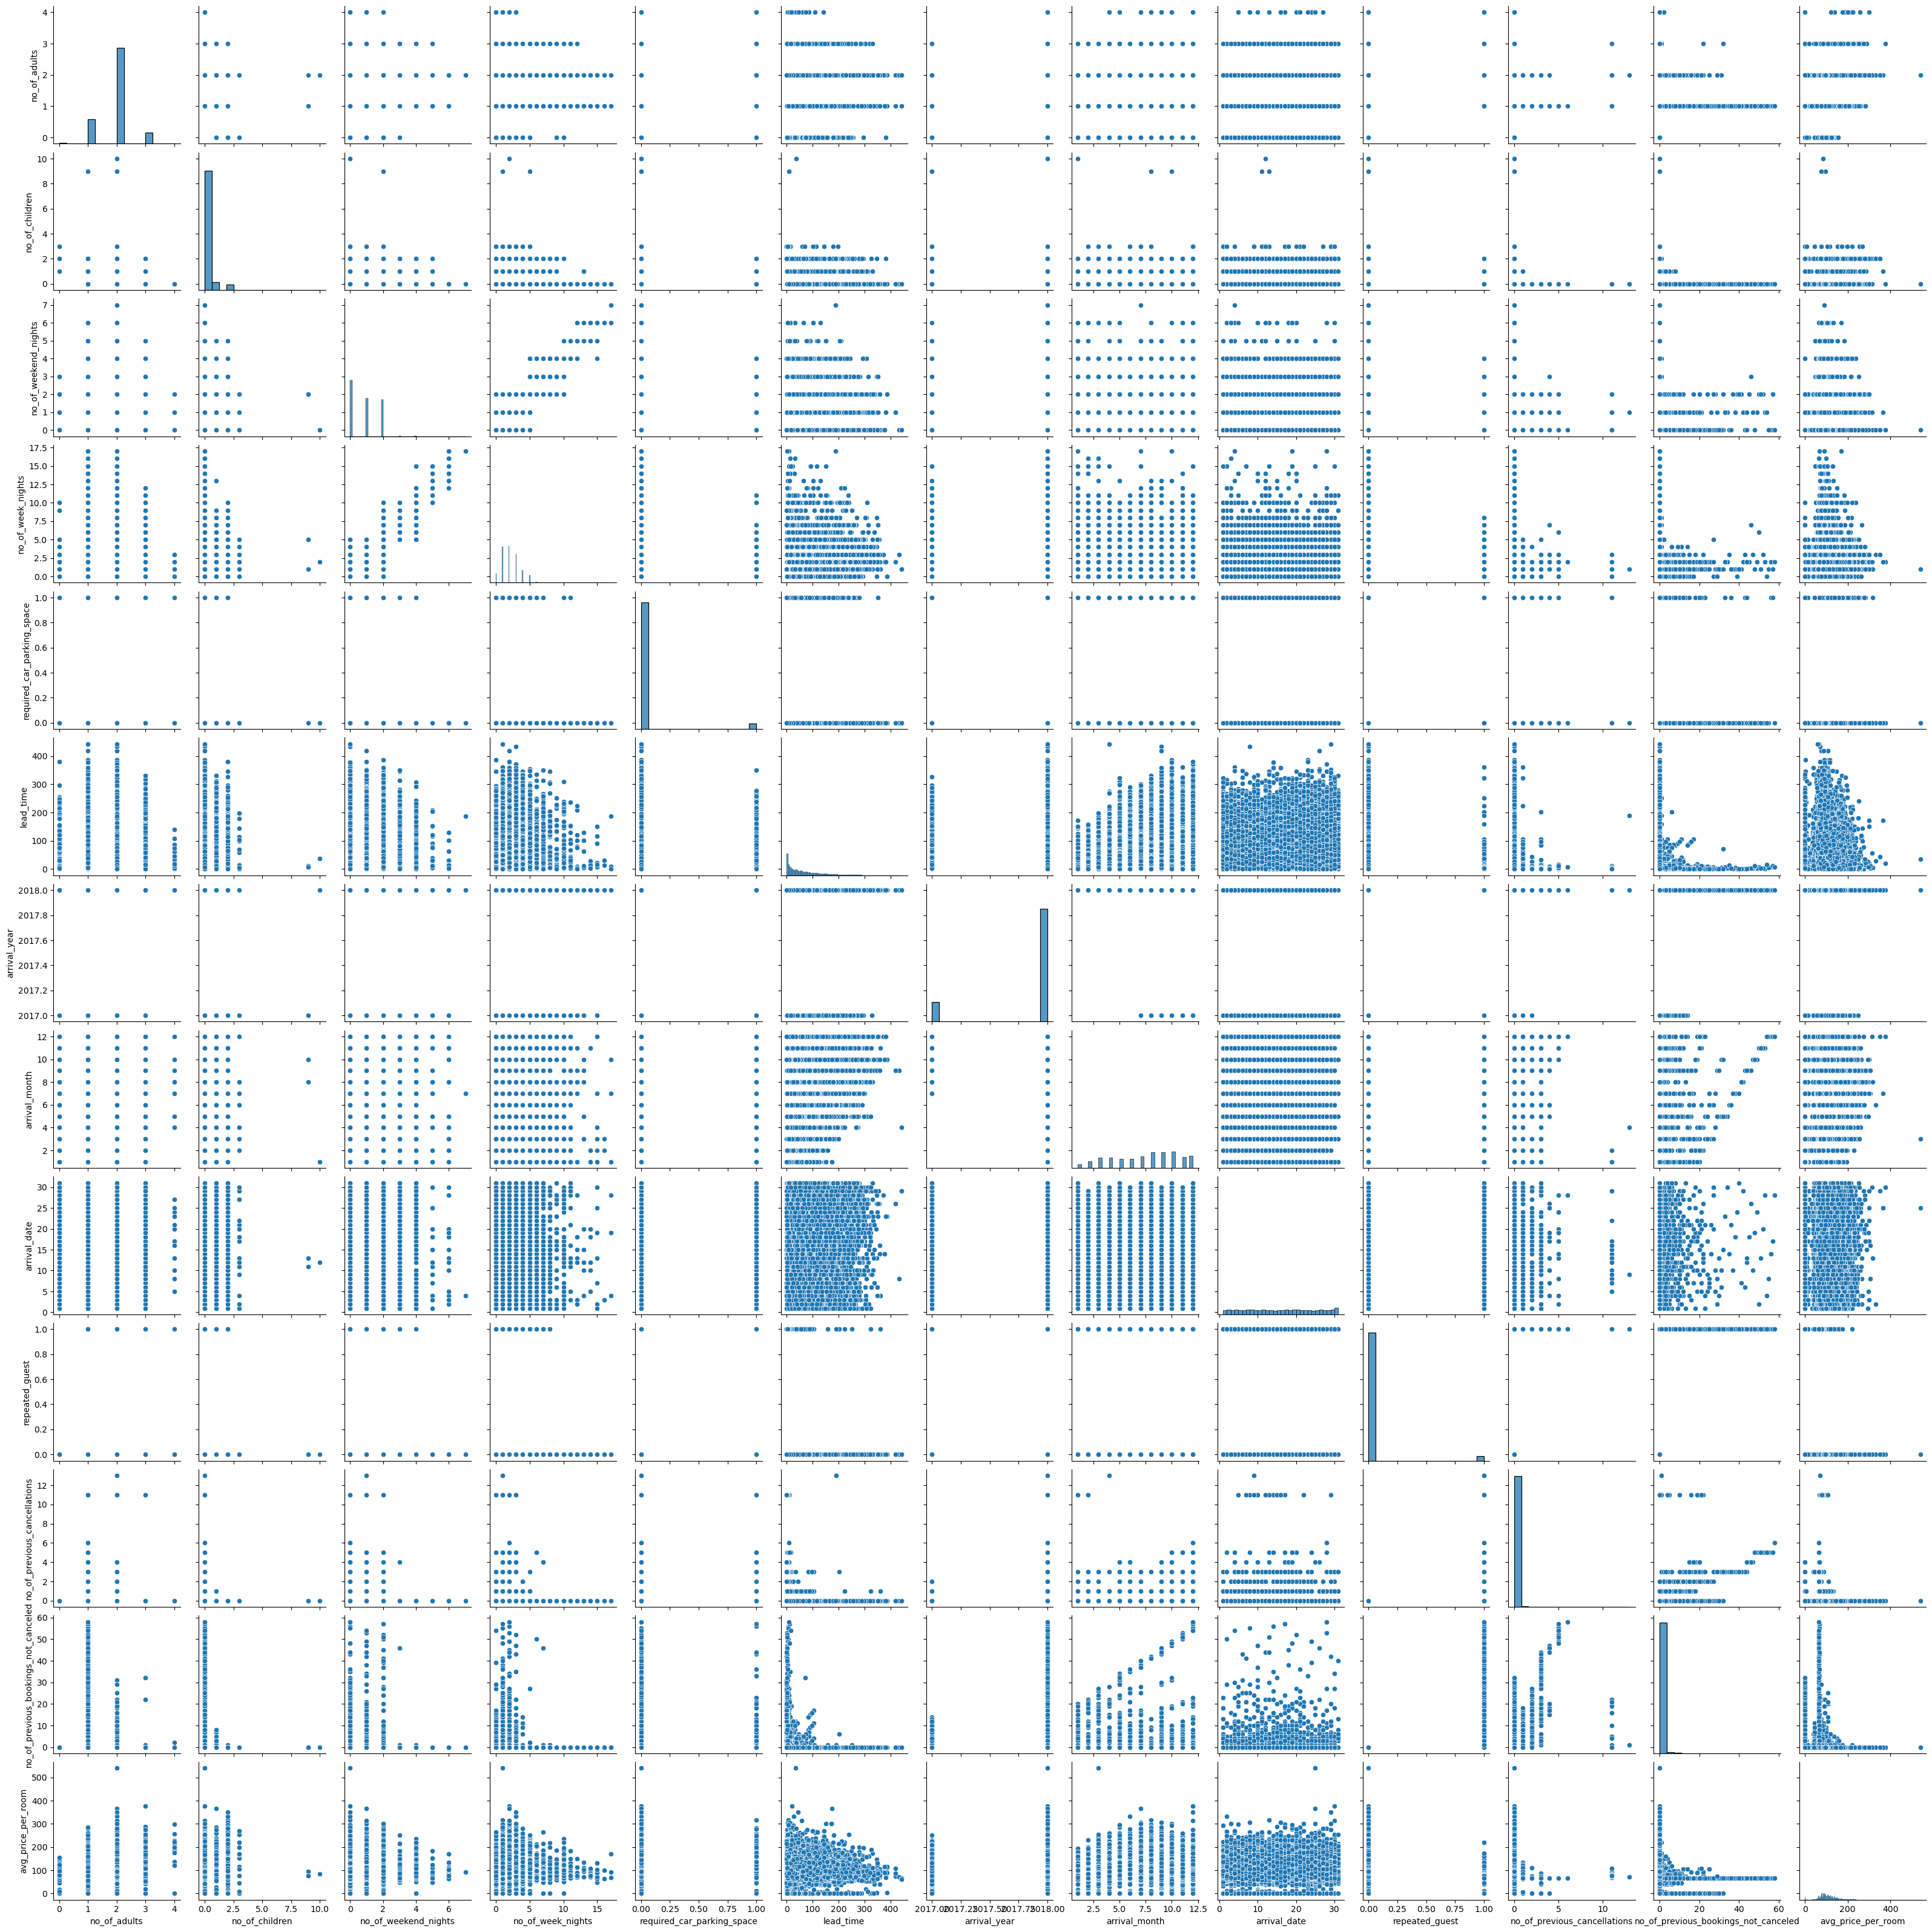

In [11]:
sns.pairplot(data=data)

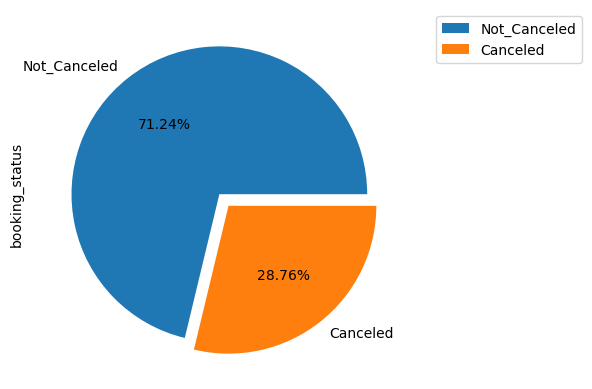

In [12]:
m=[0,0.1]
f=data.booking_status.value_counts().plot.pie(autopct='%1.2f%%',explode=m)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show();

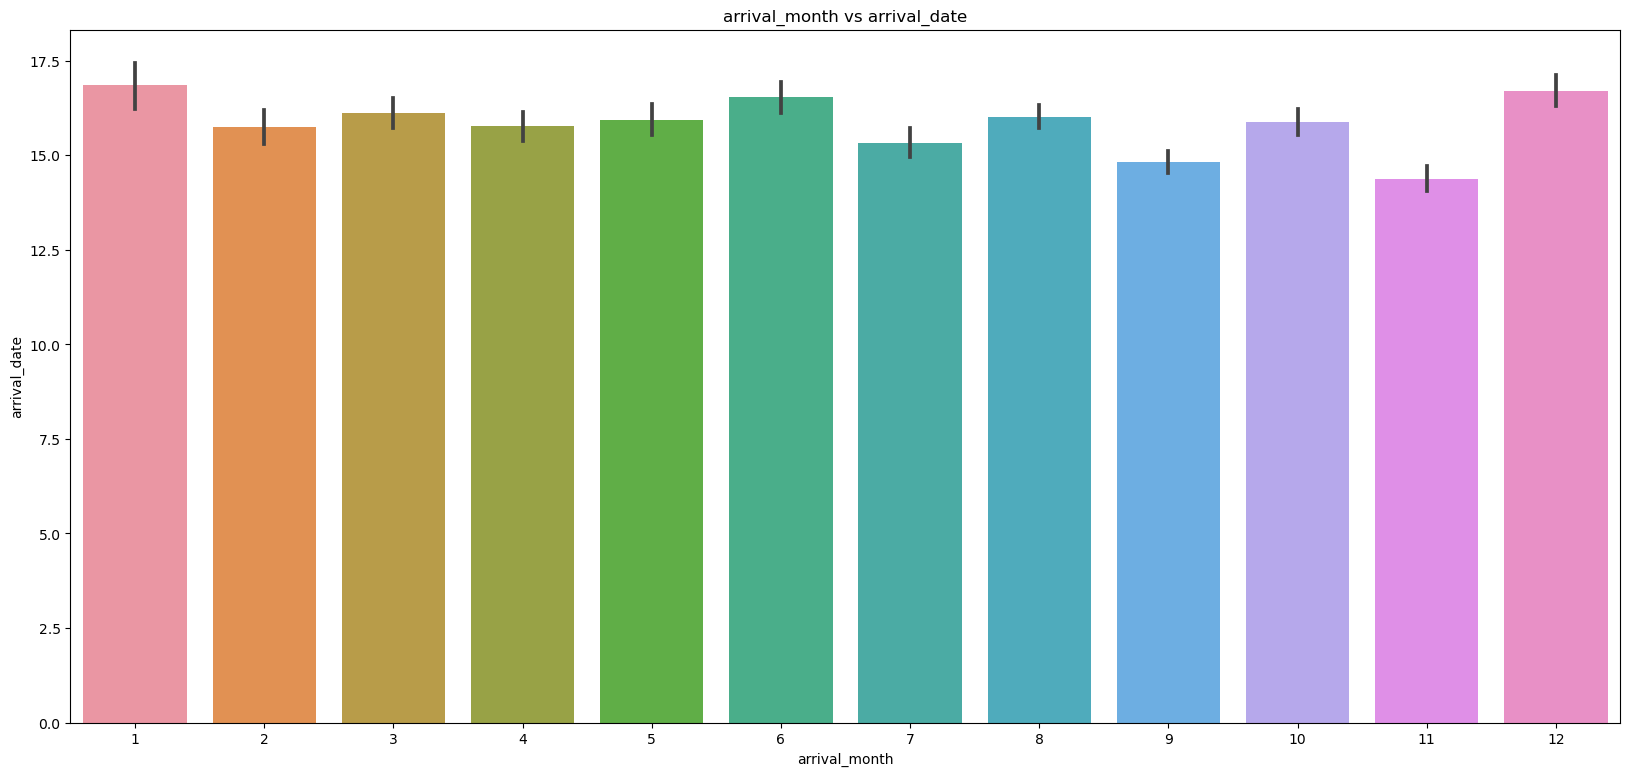

In [13]:
plt.figure(figsize=(20,9))
plt.title("arrival_month vs arrival_date")
sns.barplot(x='arrival_month',y='arrival_date',data=data);

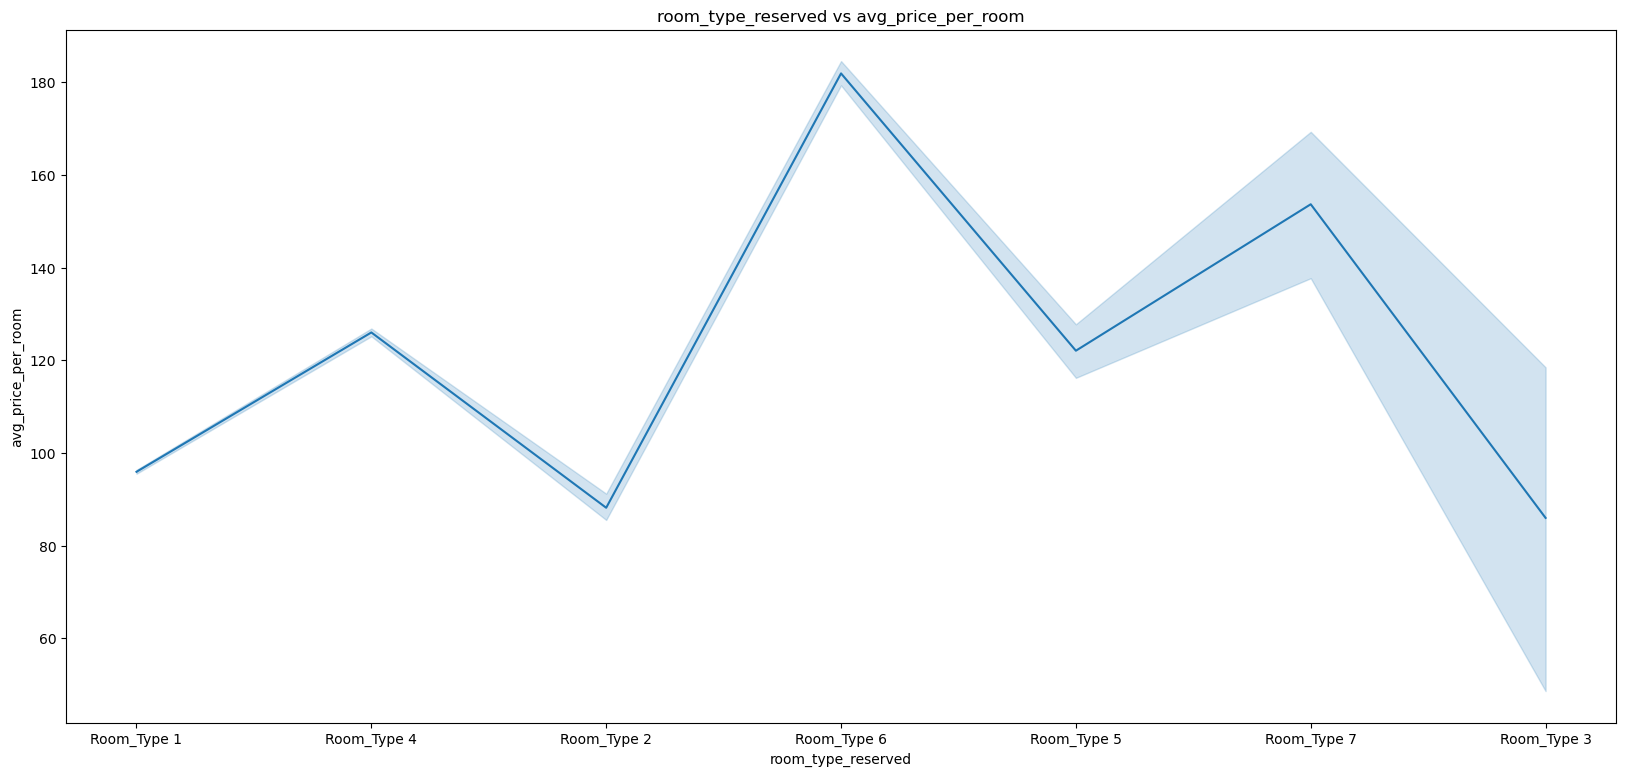

In [14]:
plt.figure(figsize=(20,9))
plt.title("room_type_reserved vs avg_price_per_room")
sns.lineplot(x='room_type_reserved',y='avg_price_per_room',data=data);

### Label Encoding

In [15]:
le=LabelEncoder()

In [16]:
col=['booking_status','market_segment_type','room_type_reserved','type_of_meal_plan']
for i in col:
    data[i]=le.fit_transform(data[i])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25615 entries, 0 to 36273
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          25615 non-null  int64  
 1   no_of_children                        25615 non-null  int64  
 2   no_of_weekend_nights                  25615 non-null  int64  
 3   no_of_week_nights                     25615 non-null  int64  
 4   type_of_meal_plan                     25615 non-null  int32  
 5   required_car_parking_space            25615 non-null  int64  
 6   room_type_reserved                    25615 non-null  int32  
 7   lead_time                             25615 non-null  int64  
 8   arrival_year                          25615 non-null  int64  
 9   arrival_month                         25615 non-null  int64  
 10  arrival_date                          25615 non-null  int64  
 11  market_segment_

### Let's re order the dataset to shift the target column to the right side

In [18]:
data = data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'booking_status','room_type_reserved']]

In [19]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,booking_status,room_type_reserved
0,2,0,1,2,0,0,224,2017,10,2,3,0,0,0,65.00,1,0
1,2,0,2,3,3,0,5,2018,11,6,4,0,0,0,106.68,1,0
2,1,0,2,1,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2,2,0,1,0,0,0,2018,10,6,4,0,0,0,216.00,0,5
36270,3,0,2,6,0,0,85,2018,8,3,4,0,0,0,167.80,1,3
36271,2,0,1,3,0,0,228,2018,10,17,4,0,0,0,90.95,0,0
36272,2,0,2,6,0,0,148,2018,7,1,4,0,0,0,98.39,1,0


### Selecting independent and target columns

In [20]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Balancing the imbalanced data

<AxesSubplot:ylabel='count'>

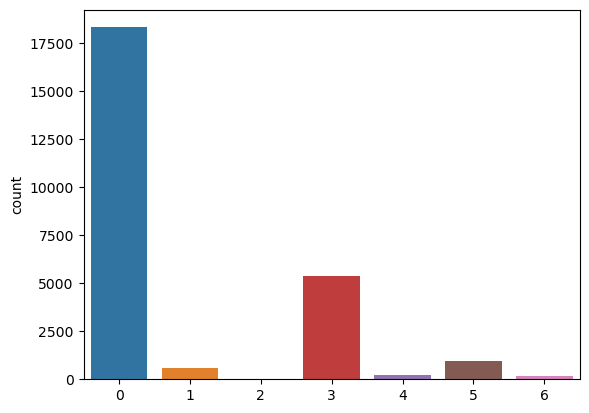

In [21]:
sns.countplot(x=y)

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote = SMOTE()

In [24]:
x, y = smote.fit_resample(x, y)

<AxesSubplot:ylabel='count'>

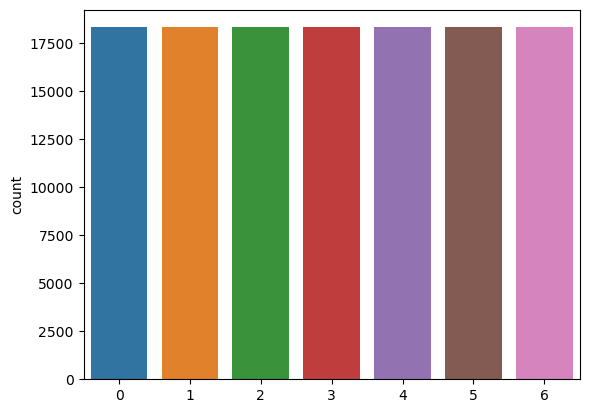

In [25]:
sns.countplot(x=y)

### Feature Scaling

In [26]:
sc = StandardScaler()

In [27]:
x = sc.fit_transform(x)

### Train test split for confusion matrix

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Confusion matrix

In [29]:
model=RandomForestClassifier()

In [30]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

model trained with RandomForestClassifier()
Model accuracy on train is::  0.999883063730267
Model accuracy on test is::  0.972987721691678
confusion_matrix train is::  [[14696     2     0     1     1     0     0]
 [    4 14676     0     0     0     0     0]
 [    0     0 14601     0     0     0     0]
 [    3     1     0 14637     0     0     0]
 [    0     0     0     0 14626     0     0]
 [    0     0     0     0     0 14707     0]
 [    0     0     0     0     0     0 14665]]
confusion_matrix test is::  [[3450   10    0  138   17    4    6]
 [  36 3584    0    7    0   17    1]
 [   1    0 3723    0    0    0    0]
 [ 274   40    1 3322   20   15   12]
 [  14    0    0   12 3672    1    0]
 [   9    0    0   28    4 3564   13]
 [   2    0    0    1    2    8 3647]]
Wrong Predictions made: 693 / 25655


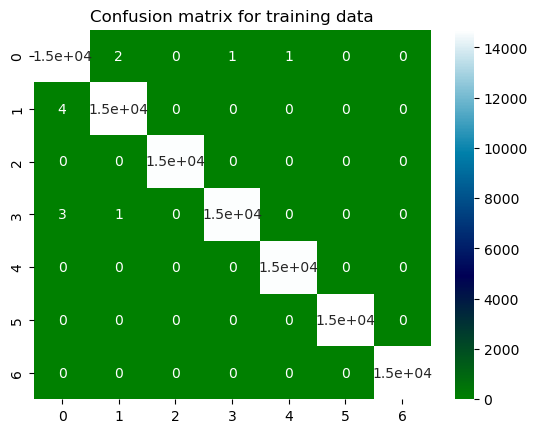

In [31]:
plt.title('Confusion matrix for training data')
sns.heatmap(con_train,annot=True,cmap='ocean');

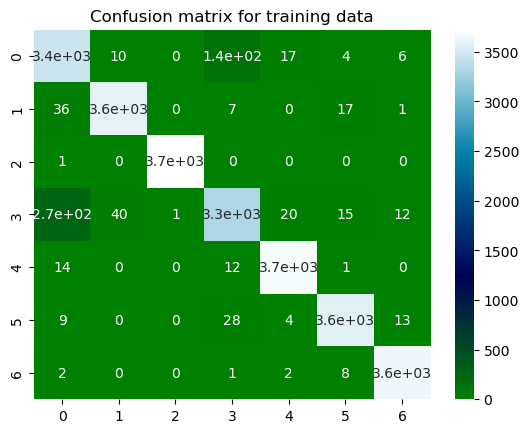

In [32]:
plt.title('Confusion matrix for testing data')
sns.heatmap(con_test,annot=True,cmap='ocean');

### OUTPUT

In [33]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [34]:
OUTPUT.sample(10)

,ACTUAL,PREDICTION
45517,2,2
25090,0,0
13061,0,0
61388,2,2
92171,4,4
41837,1,1
21152,3,3
11182,5,5
24359,0,0
118392,6,6


### Label Binerization

In [35]:
y = label_binarize(y, classes=[0,1,2,3,4,5,6])
n_classes = 7

### Train test split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Receiver Operating Characteristic(ROC) Curve of the target column

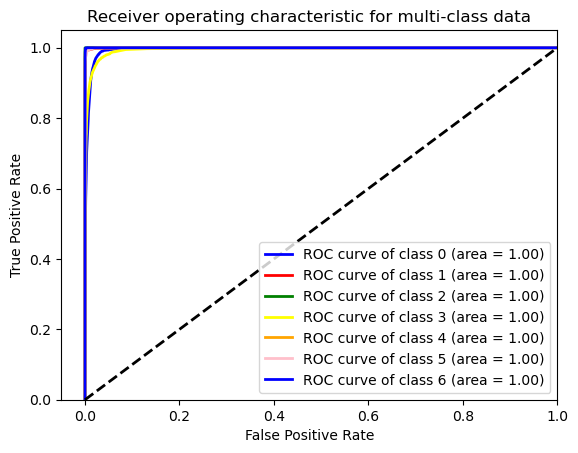

In [39]:
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()